#### Germany startups between 2023-01-01 and 2024-06-31

In [3]:
import pandas as pd

# 读取数据
csv_path = "GE_startup_2023-2024_unique_names.csv"
df = pd.read_csv(csv_path)

pd.set_option('display.max_colwidth',80)  # 你可以根据需要调整最大列宽

# 查看数据的前几行
print("First 15 rows")
display(df.head(15))

# df_unique = df.drop_duplicates(subset=['name'], keep='first')

# 查看数据的前几行
# print("First 15 rows")
# display(df_unique.head(20))

# # 将新的数据框保存到 CSV 文件
# output_csv_path = "GE_startup_2023-2024_unique_names.csv"
# df_unique.to_csv(output_csv_path, index=False)

# print(f"New CSV file saved to {output_csv_path}")
        

First 15 rows


,name,tagline,investors_name,address,industries,valuation,last_round,last_round_amount,date
0,LiveEO,LiveEO uses satellite data and machine learning algorithms to monitor infras...,MMC Ventures,"Berlin, Germany",energy oil & gas,€100-150m,SERIES B,€25m,2024.6
1,Sanity Group,Unlocking the potential of cannabinoids to develop innovative pharmaceutical...,OrganiGram,"Berlin, Germany",health pharmaceutical,€150-226m,CONVERTIBLE,€12.33m,2024.6
2,Hive,"Service, software and operations out of one hand helps you manage your brand...",Earlybird Venture Capital,"Berlin, Germany",transportation logistics & delivery,€145m,SERIES A,€18.2m,2024.6
3,Deepsafety,"We're building AiDAR™, a safe and certifiable Spatial AI Sensor to replace L...",NaN,"Berlin, Germany",robotics mobility,NaN,NaN,NaN,2024.6
4,Forward Earth,NaN,Speedinvest,"Berlin, Germany",enterprise software,€8-12m,SEED,€2m,2024.6
5,Tilta,Building the technology that brings frictionless payment terms to B2B market...,ff Venture Capital,"Berlin, Germany",fintech mortgages & lending,€16-24m,NaN,NaN,2024.6
6,ISS VOLL GESUND,NaN,Sünderhauf Holding,"Berlin, Germany",NaN,NaN,NaN,NaN,2024.6
7,Mika,The AI co-pilot for small businesses,Samen Slimmer Alliance,"Berlin, Germany",NaN,€3-5m,SEED,€0.8m,2024.6
8,Lillian Care,"Building a nationwide network of health facilities in Germany, aligning the ...",Bjoern von Siemens,"Berlin, Germany",health,€6-9m,SEED,€1.5m,2024.6
9,Restate,Without worrying about distributed systems,Redpoint Ventures,"Berlin, Germany",NaN,€28-42m,SEED,€7m,2024.6


In [4]:
total_startups = df['name'].nunique()
print(f"Total Number of Startups: {total_startups}")
num_companies_without_last_round_amount = df['last_round_amount'].isna().sum()
print(f"Number of Companies Without a Known Last Round Amount: {num_companies_without_last_round_amount}")
# Convert the last_round_amount column to numerical values
last_round_amount_cleaned = df['last_round_amount'].str.extract(r'(\d+\.?\d*)').astype(float)

# Calculate the total amount of the last round
total_last_round_amount = last_round_amount_cleaned.sum()[0]
print(f"Total Amount of the Last Round: €{total_last_round_amount:.2f} million")

Total Number of Startups: 468
Number of Companies Without a Known Last Round Amount: 145
Total Amount of the Last Round: €2742.45 million


### Company Valuation Statistics

In [5]:
valuation_cleaned = df['valuation'].str.extract(r'(\d+\.?\d*)').astype(float)
valuation_stats = valuation_cleaned.describe()
print("Company Valuation Statistics:")
print(valuation_stats)


Company Valuation Statistics:
                 0
count   340.000000
mean     77.988235
std     263.337911
min       0.000000
25%       5.000000
50%      13.500000
75%      40.000000
max    2250.000000


In [6]:

valuation_cleaned = df['valuation'].str.extract(r'(\d+\.?\d*)').astype(float)
df['valuation_cleaned'] = valuation_cleaned
non_zero_valuations = df[df['valuation_cleaned'] > 0]


top_10_valuations = non_zero_valuations.sort_values(by='valuation_cleaned', ascending=False).head(10)
print("Top 10 Valuations:")
print(top_10_valuations[['name', 'valuation_cleaned']])

last_10_valuations = non_zero_valuations.sort_values(by='valuation_cleaned', ascending=True).head(10)
print("Last 10 Valuations without 0.0m:")
print(last_10_valuations[['name', 'valuation_cleaned']])


Top 10 Valuations:
             name  valuation_cleaned
141         Enpal             2250.0
411          TIER             2000.0
306  GetYourGuide             2000.0
80          Razor             1700.0
73        Solaris             1600.0
415         Choco             1200.0
384        Raisin             1000.0
60          Flink             1000.0
322       SellerX             1000.0
220          JOKR              800.0
Last 10 Valuations without 0.0m:
                    name  valuation_cleaned
366              heyroom                1.0
154         randevu.tech                1.0
369                Amply                1.0
343              Jobreel                1.0
264         FAB Software                1.0
321  Bildungsurlauber.de                1.0
317             Converta                1.0
314               Waanda                1.0
279            Skonelabs                1.0
287            Agenta AI                1.0


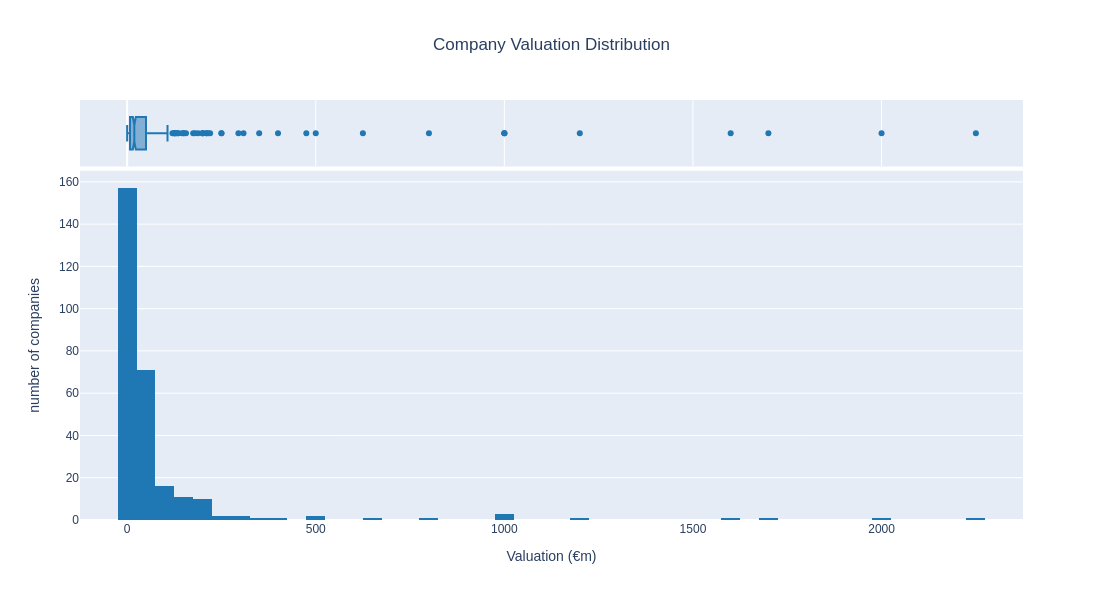

In [19]:
import plotly.express as px
df['valuation'] = df['valuation'].astype(str).str.replace('€', '').str.replace('m', '').str.replace('-', 'to').str.strip()

def convert_valuation(val):
    if pd.isna(val):
        return None
    if 'to' in val:
        parts = val.split('to')
        return (float(parts[0]) + float(parts[1])) / 2
    return float(val)

df['valuation'] = df['valuation'].apply(convert_valuation)

# 去掉缺失估值的数据
valuation_df = df.dropna(subset=['valuation'])

# 使用 Plotly 绘制估值分布图
fig = px.histogram(valuation_df, x='valuation', nbins=50, title='Company Valuation Distribution', 
                   labels={'valuation': 'Valuation (€m)'}, marginal="box", 
                   color_discrete_sequence=['#1f77b4'])

fig.update_layout(
    xaxis_title='Valuation (€m)',
    yaxis_title='number of companies',
    title={
        'x':0.5,
        'xanchor': 'center'
    }, height=600 
)

fig.show()

### Distribution of Startups by Industry

In [20]:
# Calculate the top 10 industries
top_industries = df['industries'].value_counts().head(10)

# Convert the top industries to a DataFrame for plotting
top_industries_df = top_industries.reset_index()
top_industries_df.columns = ['Industry', 'Count']
print("Top Industries")
print(top_industries_df)

Top Industries
                                 Industry  Count
0                     enterprise software     43
1                  health health platform     20
2                                 fintech     13
3               fintech wealth management      8
4                    food innovative food      7
5                  health medical devices      6
6  fintech financial management solutions      6
7                 fintech crypto and defi      6
8          food food logistics & delivery      6
9                                  health      6


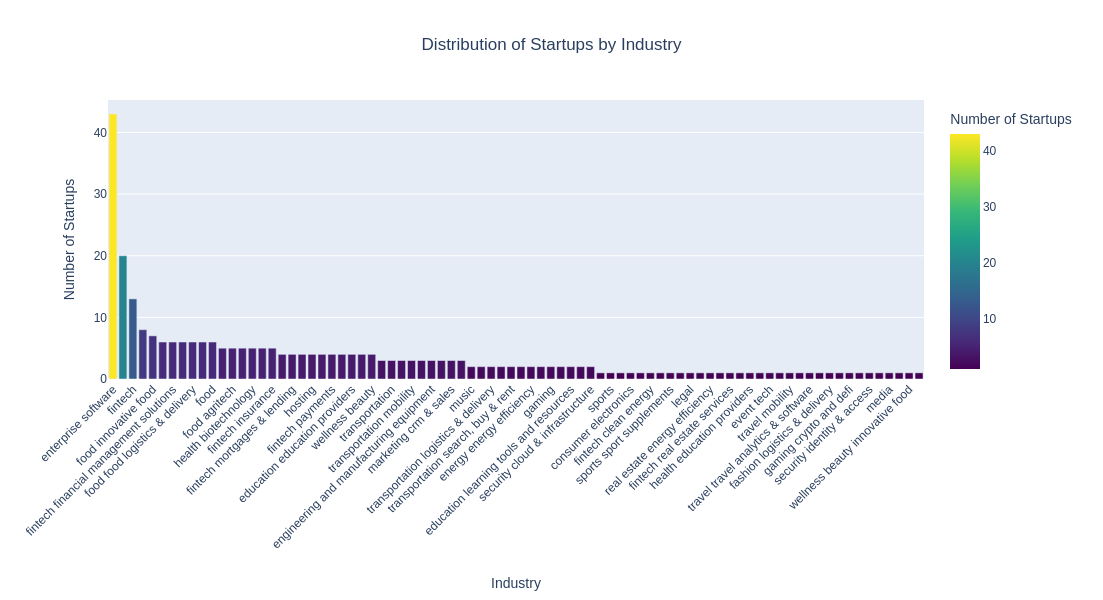

In [21]:
import pandas as pd
import plotly.express as px


# Distribution of Startups by Industry using Plotly
industry_counts = df['industries'].value_counts().reset_index()
industry_counts.columns = ['industry', 'count']

fig = px.bar(industry_counts, x='industry', y='count', title='Distribution of Startups by Industry',
             labels={'industry': 'Industry', 'count': 'Number of Startups'}, color='count',
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Industry',
    yaxis_title='Number of Startups',
    title={
        'x':0.5,
        'xanchor': 'center'
    },
    xaxis_tickangle=-45,
    height=600 
)

# Show the plot
fig.show()

# Save the plot as an HTML file
fig.write_html("industry_distribution.html")


### Funding Round and Investors

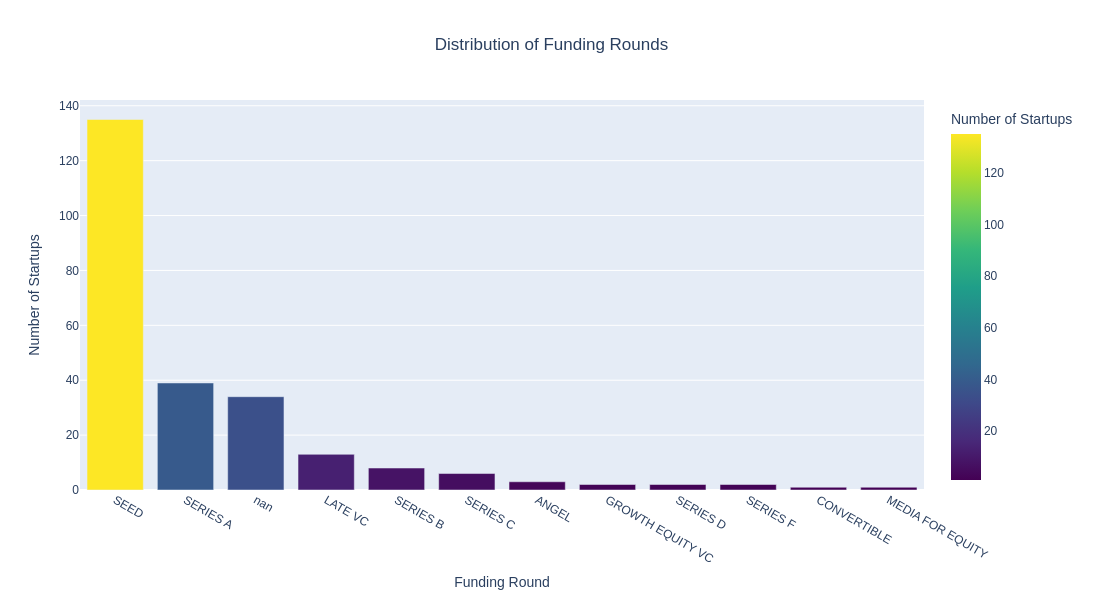

In [22]:
# 确保融资轮次数据是字符串类型，并删除缺失值
df['last_round'] = df['last_round'].astype(str).str.strip()
df = df[df['last_round'].notna() & (df['last_round'] != '')]

# 统计不同融资轮次的频次
funding_round_counts = df['last_round'].value_counts().reset_index()
funding_round_counts.columns = ['Funding Round', 'Count']
funding_round_counts = funding_round_counts.drop(2)

# 使用 Plotly 绘制融资轮次的条形图
fig = px.bar(funding_round_counts, x='Funding Round', y='Count', 
             title='Distribution of Funding Rounds', 
             labels={'Funding Round': 'Funding Round', 'Count': 'Number of Startups'},
             color='Count', color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Funding Round',
    yaxis_title='Number of Startups',
    title={
        'x':0.5,
        'xanchor': 'center'
    },
    height=600  # 调整高度
)

fig.show()

top investors by top 20 industry
                                 industries         investors_name  valuation
0                      consumer electronics             Jan Dzulko      156.0
3                                 education               Coparion       19.0
8             education education providers               Redstone       60.5
9    education learning tools and resources        Molten Ventures       75.5
12                                   energy      Planet A Ventures       15.0
..                                      ...                    ...        ...
259                         travel mobility                Neosfer       17.5
260             travel online travel agency                    KKR     2000.0
261      travel travel analytics & software          Müller Medien       25.0
265                         wellness beauty  Valor Equity Partners       40.0
266         wellness beauty innovative food                  Econa        5.0

[82 rows x 3 columns]


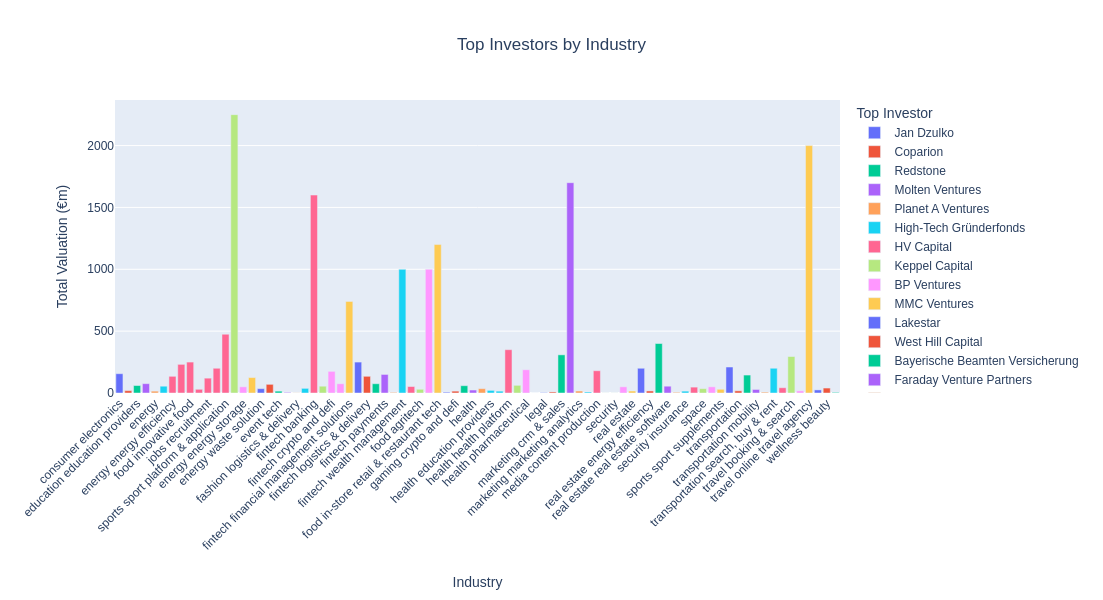

In [23]:
df['valuation'] = df['valuation'].astype(str).str.replace('€', '').str.replace('m', '').str.replace('-', 'to').str.strip()

def convert_valuation(val):
    if pd.isna(val):
        return None
    if 'to' in val:
        parts = val.split('to')
        return (float(parts[0]) + float(parts[1])) / 2
    return float(val)

df['valuation'] = df['valuation'].apply(convert_valuation)

# 去掉缺失估值、行业和投资者类型的数据
df = df.dropna(subset=['valuation', 'industries', 'investors_name'])

# 按行业和投资者类型计算每个投资者的总估值
industry_investor_valuation = df.groupby(['industries', 'investors_name'])['valuation'].sum().reset_index()

# 识别每个行业的顶级投资者
top_investors_by_industry = industry_investor_valuation.sort_values(['industries', 'valuation'], ascending=[True, False]).groupby('industries').head(1)

print("top investors by top 20 industry")
print(top_investors_by_industry)
# 使用 Plotly 绘制按行业分类的顶级投资者的估值图
fig = px.bar(top_investors_by_industry, x='industries', y='valuation', color='investors_name', 
             title='Top Investors by Industry', 
             labels={'industries': 'Industry', 'valuation': 'Total Valuation (€m)', 'investors_name': 'Top Investor'},
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Industry',
    yaxis_title='Total Valuation (€m)',
    title={
        'x':0.5,
        'xanchor': 'center'
    },
    height=600,  # 调整高度
    xaxis_tickangle=-45  # 旋转x轴标签以便更好地显示
)

fig.show()

Top 10 investors by investment count:


,Investor,Count
0,High-Tech Gründerfonds,14
1,HV Capital,12
2,Earlybird Venture Capital,8
3,Antler,7
4,Balderton Capital,7
5,IBB Ventures,7
6,Speedinvest,6
7,Atlantic Labs,6
8,Y Combinator,4
9,Project A,4


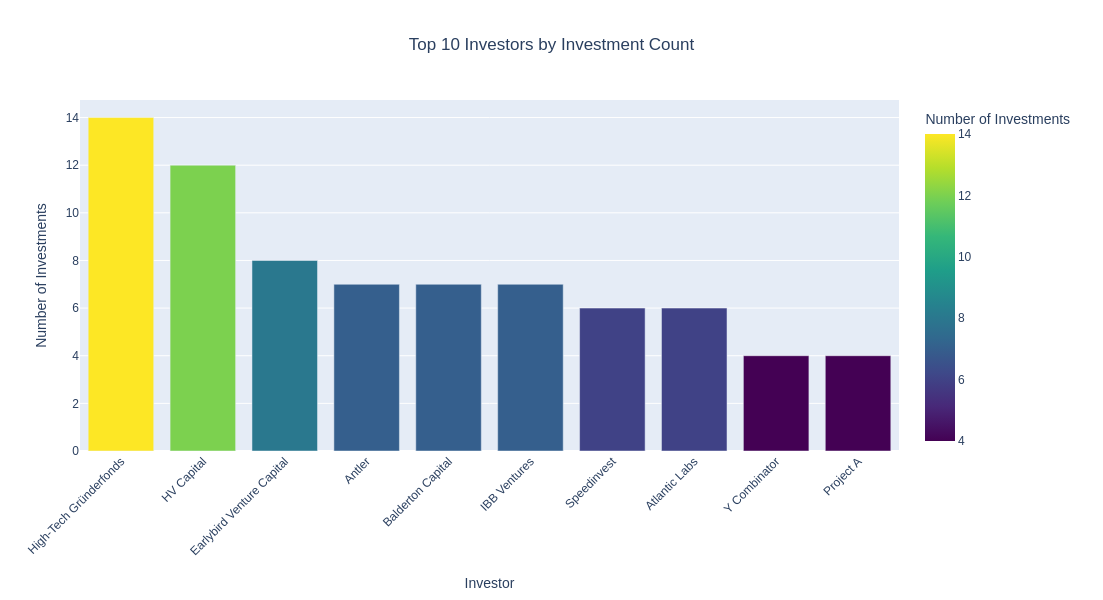

In [24]:
# 去掉缺失的投资者名称数据
df = df.dropna(subset=['investors_name'])

# 统计每个投资者的投资次数
investor_counts = df['investors_name'].value_counts().reset_index()
investor_counts.columns = ['Investor', 'Count']

# 识别投资次数最多的前10名投资者
top_investors = investor_counts.head(10)

# 打印前10名投资者
print("Top 10 investors by investment count:")
display(top_investors)

# 使用 Plotly 绘制前10名投资者的投资次数图
fig = px.bar(top_investors, x='Investor', y='Count', 
             title='Top 10 Investors by Investment Count', 
             labels={'Investor': 'Investor', 'Count': 'Number of Investments'},
             color='Count', color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Investor',
    yaxis_title='Number of Investments',
    title={
        'x':0.5,
        'xanchor': 'center'
    },
    height=600,  # 调整高度
    xaxis_tickangle=-45  # 旋转x轴标签以便更好地显示
)

fig.show()

Top 10 investors by total valuation:


,investors_name,valuation
107,Keppel Capital,2250.0
105,KKR,2000.0
143,Presight Capital,1700.0
156,SBI Group,1600.0
82,HV Capital,1546.0
31,Bessemer Venture Partners,1410.0
26,Balderton Capital,1317.0
146,REWE Group,1022.5
4,83North,1000.0
80,Goldman Sachs,1000.0


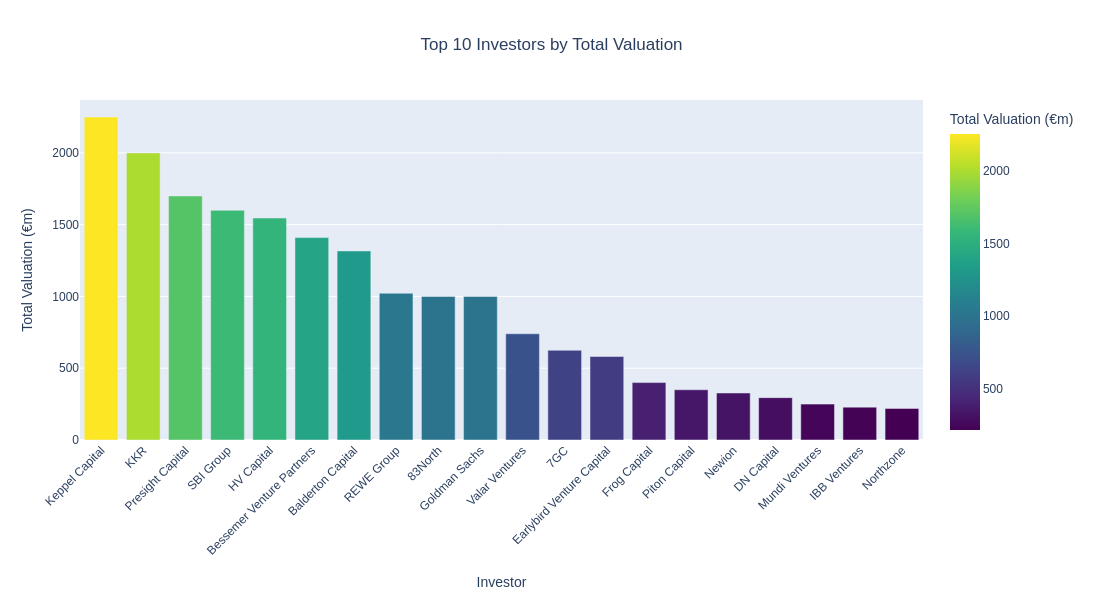

In [25]:
df['valuation'] = df['valuation'].astype(str).str.replace('€', '').str.replace('m', '').str.replace('-', 'to').str.strip()

def convert_valuation(val):
    if pd.isna(val):
        return None
    if 'to' in val:
        parts = val.split('to')
        return (float(parts[0]) + float(parts[1])) / 2
    return float(val)

df['valuation'] = df['valuation'].apply(convert_valuation)

# 去掉缺失估值和投资者类型的数据
df = df.dropna(subset=['valuation', 'investors_name'])

# 按投资者类型计算每个投资者的总估值
investor_valuation = df.groupby('investors_name')['valuation'].sum().reset_index()

# 识别投资金额最多的前10名投资者
top_investors = investor_valuation.sort_values(by='valuation', ascending=False).head(20)

# 打印前10名投资金额的投资者
print("Top 10 investors by total valuation:")
display(top_investors)

# 使用 Plotly 绘制前10名投资者的总投资金额图
fig = px.bar(top_investors, x='investors_name', y='valuation', 
             title='Top 10 Investors by Total Valuation', 
             labels={'investors_name': 'Investor', 'valuation': 'Total Valuation (€m)'},
             color='valuation', color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Investor',
    yaxis_title='Total Valuation (€m)',
    title={
        'x':0.5,
        'xanchor': 'center'
    },
    height=600,  # 调整高度
    xaxis_tickangle=-45  # 旋转x轴标签以便更好地显示
)

fig.show()

Top industries by total valuation:


,industries,valuation
48,marketing ecommerce solutions,2720.0
7,energy energy providers,2326.0
78,travel online travel agency,2000.0
29,food food logistics & delivery,1931.5
17,fintech banking,1835.0
26,fintech wealth management,1737.0
12,enterprise software,1544.5
30,food in-store retail & restaurant tech,1222.5
38,health health platform,1035.0
20,fintech financial management solutions,953.5


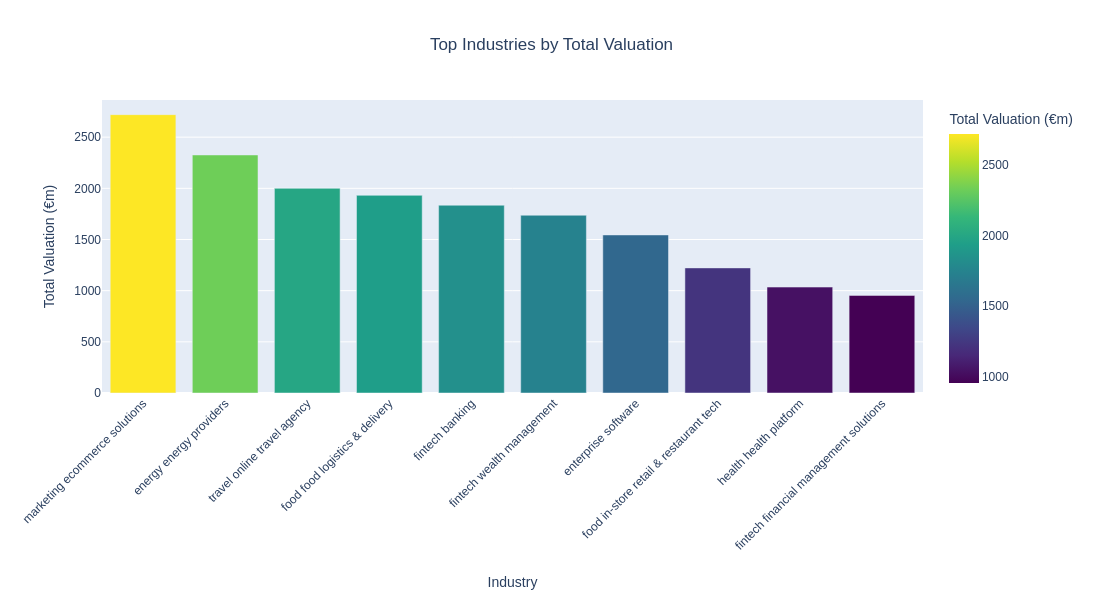

In [26]:
# 确保估值数据是字符串类型，然后清洗估值数据，去掉非数字字符并转换为浮点数
df['valuation'] = df['valuation'].astype(str).str.replace('€', '').str.replace('m', '').str.replace('-', 'to').str.strip()

def convert_valuation(val):
    if pd.isna(val):
        return None
    if 'to' in val:
        parts = val.split('to')
        return (float(parts[0]) + float(parts[1])) / 2
    return float(val)

df['valuation'] = df['valuation'].apply(convert_valuation)

# 去掉缺失估值和行业的数据
df = df.dropna(subset=['valuation', 'industries'])

# 按行业计算每个行业的总估值
industry_valuation = df.groupby('industries')['valuation'].sum().reset_index()

# 识别估值最高的行业
top_industries = industry_valuation.sort_values(by='valuation', ascending=False).head(10)

# 打印估值最高的行业
print("Top industries by total valuation:")
display(top_industries)

# 使用 Plotly 绘制估值最高的行业图
fig = px.bar(top_industries, x='industries', y='valuation', 
             title='Top Industries by Total Valuation', 
             labels={'industries': 'Industry', 'valuation': 'Total Valuation (€m)'},
             color='valuation', color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Industry',
    yaxis_title='Total Valuation (€m)',
    title={
        'x':0.5,
        'xanchor': 'center'
    },
    height=600,  # 调整高度
    xaxis_tickangle=-45  # 旋转x轴标签以便更好地显示
)

fig.show()

Monthly startup counts:


,YearMonth,Count
0,2023.1,37
12,2023.11,13
14,2023.12,12
5,2023.2,17
1,2023.3,22
15,2023.4,12
3,2023.5,19
2,2023.6,20
11,2023.7,13
8,2023.8,16


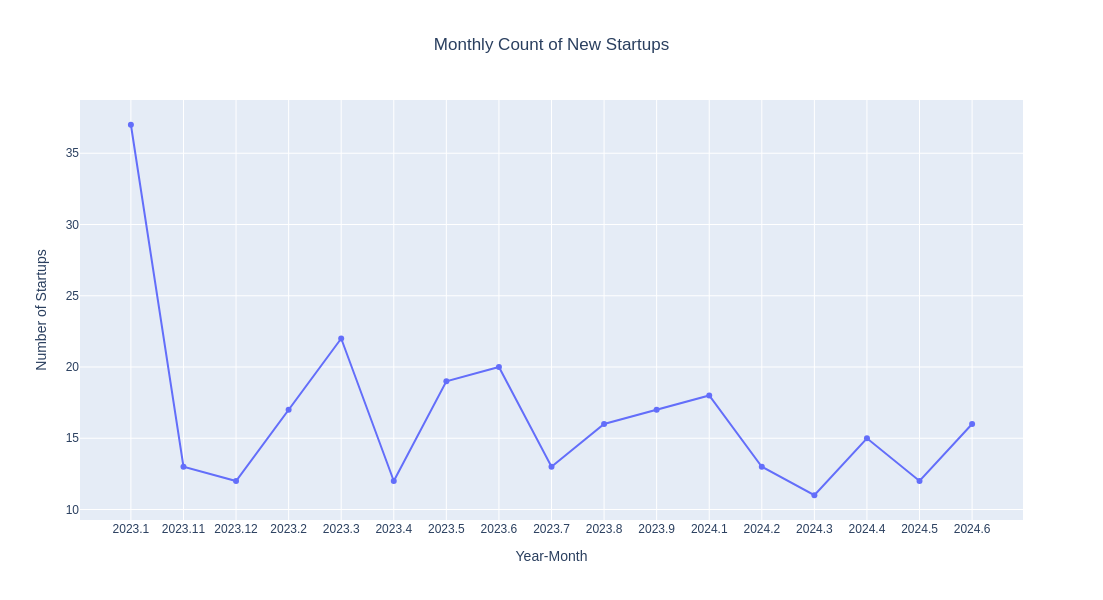

In [27]:
# 确保成立时间数据是字符串类型，并删除缺失值
df['date'] = df['date'].astype(str).str.strip()
df = df.dropna(subset=['date'])

# 提取年份和月份
df['year_month'] = df['date'].apply(lambda x: '.'.join(x.split('.')[:2]))

# 统计每个月的新初创公司数量
monthly_counts = df['year_month'].value_counts().reset_index()
monthly_counts.columns = ['YearMonth', 'Count']
monthly_counts = monthly_counts.sort_values(by='YearMonth')

# 打印统计结果
print("Monthly startup counts:")
display(monthly_counts)

# 使用 Plotly 绘制每个月新初创公司数量的趋势图
fig = px.line(monthly_counts, x='YearMonth', y='Count', 
              title='Monthly Count of New Startups', 
              labels={'YearMonth': 'Year-Month', 'Count': 'Number of Startups'},
              markers=True)

fig.update_layout(
    xaxis_title='Year-Month',
    yaxis_title='Number of Startups',
    title={
        'x':0.5,
        'xanchor': 'center'
    },
    height=600  # 调整高度
)

fig.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from IPython.display import display, HTML



# 删除包含缺失值的整行
df = df.dropna(subset=['industries', 'name'])

# 提取taglines和公司名称
taglines = df['industries'].tolist()
companies = df['name'].tolist()
# 确保taglines和companies数量一致
if len(taglines) != len(companies):
    raise ValueError("Taglines and companies lists are of unequal length!")

# 文本向量化
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(taglines)

# 确保向量化结果正确
print("Shape of TF-IDF matrix:", X.shape)

# 计算相似性
similarity_matrix = cosine_similarity(X, X)

# 检查相似性矩阵的形状
print("Shape of similarity matrix:", similarity_matrix.shape)

# 构建关系
threshold = 0.3  # 设定相似度阈值
edges = []
for i in range(len(companies)):
    for j in range(i + 1, len(companies)):
        if similarity_matrix[i, j] > threshold:
            edges.append((companies[i], companies[j], similarity_matrix[i, j]))

# 创建图
G = nx.Graph()
# 添加带标签的节点
for i, company in enumerate(companies):
    G.add_node(company, title=f'{company}<br>{taglines[i]}', font={'size': 35})  # 设置字体大小

# 添加边
G.add_weighted_edges_from(edges)

# 使用pyvis进行交互式可视化
net = Network(notebook=True, width="1200px", height="600px", cdn_resources="in_line")
net.from_nx(G)
net.show("company_network.html")

# 显示图表
display(HTML("company_network.html"))


Shape of TF-IDF matrix: (283, 100)
Shape of similarity matrix: (283, 283)
company_network.html
